# Best Markets for Advertising

In this scenario we are data analysts for an online e-learning company that specializes in programming courses. We cover domains such as data science, game development, but our primary focus is web and mobile development.
Our goal is to promote our products and invest money in more advertisement, but to do that we need to know what markets to advertise in.

The company operates subscription-based learning . The current price to access our learning platform is 59 USD per month.

It's costly to organize surveys, but to start with we can use two datasets from an e-learning platform called freeCodeCamp. In 2016and 2017 they performed a survey aimed at a new programmers. This survey is a good candidate to begin our analysis.

*https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969*

Github repository:
*https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data* Survey Year 2017

*https://github.com/freeCodeCamp/2016-new-coder-survey#about-the-data* Survey Year 2016



We want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

Method
* Load datasets
* Clean dataframes, including standardizing any columns if needed
* Concatenate/merge datasets
* Correct any remaining inconsistencies/errors
* Perform analysis and visualization

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
%matplotlib inline

In [2]:
pd.options.display.max_columns = 150 # to avoid truncated output 
csv = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory= False)
csv

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [3]:
csv2016 = pd.read_csv("2016-fCC-New-Coders-Survey-Data.csv", low_memory = False)
csv2016

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventBootcamp,CodeEventCoffee,CodeEventConferences,CodeEventDjangoGirls,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWomenCode,CodeEventWorkshop,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobRelocateYesNo,JobRoleInterest,JobRoleInterestOther,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodingBlocks,PodcastDeveloperTea,PodcastDotNetRocks,PodcastHanselminutes,PodcastJsAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgrammingThrowDown,PodcastRubyRogues,PodcastSEDaily,PodcastShopTalk,PodcastTalkPython,PodcastWebAhead,ResourceBlogs,ResourceBooks,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceDevTips,ResourceEdX,ResourceEggHead,ResourceFCC,ResourceGoogle,ResourceHackerRank,ResourceKhanAcademy,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,United States of America,United States of America,office and administrative support,NaN,Employed for wages,NaN,NaN,0.0,male,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,30.0,cef35615d61b202f1dc794ef2746df14,48fd66e15301df9727e13e6e80aef941,32000.0,0.0,0.0,0.0,1.0,NaN,freelance,NaN,NaN,NaN,NaN,English,married or domestic partnership,0.0,1.0,2c6f0af42c,2016-03-29 21:24:53,2016-03-29 21:23:13,2016-03-29 21:27:25,2016-03-29 21:24:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,United States of America,United States of America,food and beverage,NaN,Employed for wages,NaN,50000.0,NaN,male,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,323e5a113644d18185c743c241407754,a8cd67193184084b1e32b362225bf280,15000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a startup,1.0,Front-End Web Developer,NaN,in an office with other developers,English,NaN,20.0,2.0,d048ac774d,2016-03-29 21:27:09,2016-03-29 21:24:59,2016-03-29 21:29:10,2016-03-29 21:27:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Front-end happy hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,United States of America,United States of America,finance,NaN,Employed for wages,NaN,NaN,NaN,male,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,20.0,b29a1027e5cd062e654a63764157461d,129b4479808fe006e768502b957a0c52,48000.0,0.0,0.0,0.0,0.0,NaN,start your own business,NaN,NaN,NaN,NaN,English,NaN,50.0,24.0,241513bbbe,2016-03-29 21:27:11,2016-03-29 21:25:37,2016-03-29 21:28:21,2016-03-29 21:27:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Na

## Drop Columns

The first step in our analysis is to identify the appropriate columns that are relevant. Unfortunately there are over 100 columns which is far too many for a practical analysis.

We can use the json file from the author's github repository page to identify useful and irrelevant columns. Unfortunately it's a rather manual and tedious process and there are far too many columns to list for deletion. Instead we'll sequentially drop slices of columns since we cannot drop lists and slices at the same time using python code.

In [4]:
# Index location of the first set of columns to drop
print(csv.columns.get_loc("CodeEventConferences"))
print(csv.columns.get_loc("CodeEventWorkshops"))

8
23


In [5]:
# Drops columns
csv = csv.drop(csv.iloc[:, 8:23], axis=1)

In [6]:
# Index location of the next set of columns to drop
print(csv.columns.get_loc("NetworkID"))
print(csv.columns.get_loc("ResourceW3S"))

59
100


In [7]:
csv = csv.drop(csv.iloc[:, 59:100], axis=1)

In [8]:
print(csv.columns.get_loc("YouTubeCodeCourse"))

63


In [9]:
# Drop remaining columns including index postion 63 and onward
csv = csv.drop(csv.iloc[:, 63:], axis=1)
csv

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,1.0,"some college credit, no degree",NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,1.0,"some college credit, no degree",NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40000.0,14.0,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,Portuguese,married or domestic partnership,0.0,5.0,NaN,"some college credit, no degree",NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,aa3f061a1949a90b27bef7411ecd193f,d7c56bbf2c7b62096be9db010e86d96d,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Full-Stack Web Developer, Information Security...",in an office with other developers,Portuguese,"single, never married",0.0,24.0,NaN,bachelor's degree,Information Technology,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [10]:
csv.info(memory_usage= "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15367 non-null  float64
 1   AttendedBootcamp               17709 non-null  float64
 2   BootcampFinish                 1069 non-null   float64
 3   BootcampLoanYesNo              1079 non-null   float64
 4   BootcampName                   949 non-null    object 
 5   BootcampRecommend              1073 non-null   float64
 6   ChildrenNumber                 2314 non-null   float64
 7   CityPopulation                 15354 non-null  object 
 8   CodeEventWorkshops             1753 non-null   float64
 9   CommuteTime                    9246 non-null   object 
 10  CountryCitizen                 15382 non-null  object 
 11  CountryLive                    15336 non-null  object 
 12  EmploymentField                8116 non-null  

In [11]:
csv.iloc[:,:20]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,I work from home,Indonesia,Indonesia,software development and IT,NaN,Self-employed freelancer,NaN,NaN,0.0,NaN,male
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,Less than 15 minutes,Nigeria,Nigeria,transportation,NaN,Self-employed freelancer,NaN,70000.0,1.0,NaN,male
18172,39.0,0.0,NaN,NaN,NaN,NaN,3.0,more than 1 million,1.0,45 to 60 minutes,South Africa,South Africa,NaN,IT support and website update,Employed for wages,NaN,NaN,0.0,1.0,male
18173,54.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,Less than 15 minutes,United Kingdom,United Kingdom,education,NaN,Employed for wages,NaN,NaN,0.0,NaN,male


If we utilize the following code below we'll get a better understanding of missing data in the columns. We expect for a lot of columns to be missing data, because there are likely many instances of respondents failing to enter information during the survey. 

In [12]:
#pd.set_option('display.max_rows', None)  # or 1000
series = csv.apply(pd.isnull).sum()/csv.shape[0] * 100

# Columns with less than or equal to 60% missing data points
list = series[series <= 60].index


In [13]:
print(series)

Age                  15.449794
AttendedBootcamp      2.563961
BootcampFinish       94.118294
BootcampLoanYesNo    94.063274
BootcampName         94.778542
                       ...    
MonthsProgramming     6.002751
ResourceW3S          46.272352
SchoolDegree         15.444292
SchoolMajor          51.983494
StudentDebtOwe       81.502063
Length: 63, dtype: float64


In [14]:
# Converts the list of columns we want to use from pandas.index to list
cols_to_use = pd.Index.tolist(list)
cols_to_use.append("JobRoleInterest")
cols_to_use.append("BootcampFinish")
cols_to_use.append("ExpectedEarning")

In [15]:
# Isolates the dataframe down to only preferred columns
csv = csv[cols_to_use]

In [16]:
csv

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,ResourceW3S,SchoolDegree,SchoolMajor,JobRoleInterest,BootcampFinish,ExpectedEarning
0,27.0,0.0,more than 1 million,15 to 29 minutes,Canada,Canada,software development and IT,Employed for wages,female,1.0,0.0,1.0,0.0,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,start your own business,NaN,English,married or domestic partnership,150.0,6.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN
1,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,0.0,1.0,0.0,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.0,6.0,1.0,"some college credit, no degree",NaN,Full-Stack Web Developer,NaN,35000.0
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.0,0.0,1.0,0.0,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married",1000.0,5.0,NaN,high school diploma or equivalent (GED),NaN,"Front-End Web Developer, Back-End Web Develo...",NaN,70000.0
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,male,1.0,1.0,1.0,0.0,14.0,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a medium-sized company,from home,Portuguese,married or domestic partnership,0.0,5.0,NaN,"some college credit, no degree",NaN,"Front-End Web Developer, Full-Stack Web Deve...",NaN,40000.0
4,20.0,0.0,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,female,0.0,0.0,1.0,0.0,10.0,aa3f061a1949a90b27bef7411ecd193f,d7c56bbf2c7b62096be9db010e86d96d,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a multinational corporation,in an office with other developers,Portuguese,"single, never married",0.0,24.0,NaN,bachelor's degree,Information Technology,"Full-Stack Web Developer, Information Security...",NaN,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,more than 1 million,I work from home,Indonesia,Indonesia,software development and IT,Self-employed freelancer,male,1.0,1.0,0.0,0.0,10.0,3ca0354e77ccbdf5d762adab90ffff91,34d08433308c04cd55708ba405d8b519,60000.0,0.0,0.0,0.0,0.0,NaN,start your own business,NaN,Indonesian,married or domestic partnership,10.0,1.0,NaN,bachelor's degree,Telecommunications Technician,NaN,NaN,NaN
18171,31.0,0.0,more than 1 million,Less than 15 minutes,Nigeria,Nigeria,transportation,Self-employed freelancer,male,1.0,1.0,0.0,0.0,1.0,fc867e53a2adb0b425d2acacaef17faa,6798a2a1aa62ec516ac2ac540883001a,60000.0,0.0,0.0,0.0,1.0,more than 12 months from now,work for a nonprofit,no preference,English,divorced,10000.0,1.0,NaN,high school diploma or equivalent (GED),NaN,"DevOps / SysAdmin, Mobile Developer, Pro...",NaN,70000.0
18172,39.0,0.0,more than 1 million,45 to 60 minutes,South Africa,South Africa,NaN,Employed for wages,male,1.0,1.0,0.0,0.0,10.0,6871d7f091c6541d3d0a6ebd159f31d2,f6fdd490538c1ae2f36acb1c4d8b829e,1000000.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,Zulu,married or domestic partnership,19.0,3.0,1.0,some high school,NaN,NaN,NaN,NaN
18173,54.0,0.0,"between 100,000 and 1 million",Less than 15 mi

In [17]:
# Drop id.x and id.y columns
csv = csv.drop(columns=["ID.x","ID.y","ResourceW3S"])

In [18]:
# Count missing data
nulls = csv.apply(pd.isnull).sum()/csv.shape[0] * 100
nulls = nulls.sort_values()

In [19]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15367 non-null  float64
 1   AttendedBootcamp               17709 non-null  float64
 2   CityPopulation                 15354 non-null  object 
 3   CommuteTime                    9246 non-null   object 
 4   CountryCitizen                 15382 non-null  object 
 5   CountryLive                    15336 non-null  object 
 6   EmploymentField                8116 non-null   object 
 7   EmploymentStatus               14345 non-null  object 
 8   Gender                         15454 non-null  object 
 9   HasDebt                        15291 non-null  float64
 10  HasFinancialDependents         15329 non-null  float64
 11  HasHighSpdInternet             15380 non-null  float64
 12  HasServedInMilitary            15256 non-null 

In [20]:
csv["Year"] = 2017

In [21]:
column_lists = csv.columns.to_list()
column_lists

['Age',
 'AttendedBootcamp',
 'CityPopulation',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentStatus',
 'Gender',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasServedInMilitary',
 'HoursLearning',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits',
 'IsSoftwareDev',
 'IsUnderEmployed',
 'JobApplyWhen',
 'JobPref',
 'JobWherePref',
 'LanguageAtHome',
 'MaritalStatus',
 'MoneyForLearning',
 'MonthsProgramming',
 'SchoolDegree',
 'SchoolMajor',
 'JobRoleInterest',
 'BootcampFinish',
 'ExpectedEarning',
 'Year']

In [22]:
csv2016["Year"] = 2016

In [23]:
survey_2016 = csv2016[column_lists]

## Merge Dataframes

In [24]:
combined_survey = pd.concat([csv, survey_2016])

Most of the courses offered on our e-learning platform are for web and mobile development. We need to identify if the sample from the dataset is representative of the population of new coders.

In [25]:
interests = combined_survey["JobRoleInterest"].value_counts(normalize=True) * 100
interests.head(20)

Full-Stack Web Developer                                                       25.150056
  Front-End Web Developer                                                      13.553168
Back-End Web Developer                                                          6.268989
  Data Scientist / Data Engineer                                                4.786958
  Mobile Developer                                                              3.934791
  User Experience Designer                                                      2.423120
  DevOps / SysAdmin                                                             1.889589
  Product Manager                                                               1.822897
  Data Scientist                                                                1.126343
  Quality Assurance Engineer                                                    0.881808
Game Developer                                                                  0.844757
Information Security 

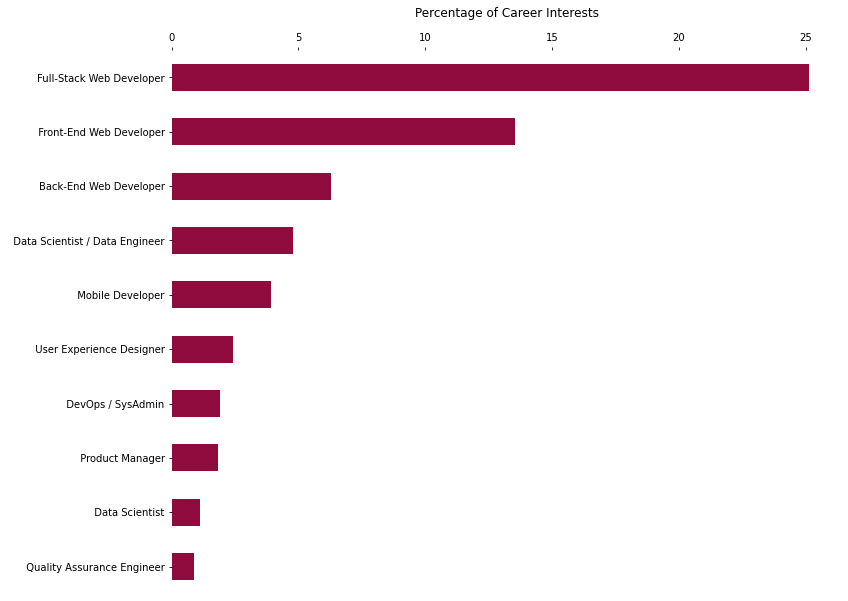

In [26]:
# Career interests
fig, ax = plt.subplots(figsize = (12, 10))
interests.head(10).plot(kind = "barh", color = "#900C3F")
plt.title("Percentage of Career Interests", y = 1.05)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.show()

A lot of people are interested in learning about web development (full stack, front end, and back end). However we have many more entries that include multiple categories, so it looks like we have a representative sample. While we have many different job interest categories, more than 60 % of the data points in the `JobRoleInterest` column are missing.

As there are many other entries that include multiple job categories we can split each string for each row in the `JobRoleInterest` column. This will help us understand the number of choices that each person selected. 

When we selected only the `JobRoleInterest` column from earlier we saw that many rows contained multiple job role interests or (categories). Some people stated they were interested in many, and some expressed interest in only one. To split the data points we'll need to exlude missing data, because we cannot split NaNs (missing data).

We can split each occurance of a job category for rows containing multiple categories. To do this we'll have to use `pandas.Series.str.split`. This approach will help us count every individual job category.

In [27]:
# Creates separate copy from main dataframe
#survey = csv.copy()

# New dataframe excluding any missing data from JobRoleInterest column
survey = combined_survey[combined_survey["JobRoleInterest"].notnull()].copy()

# Splits each occurence of a job category
survey["JobRoleInterest"] = survey["JobRoleInterest"].str.split("\s*,\s*")

In [28]:
survey

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,JobRoleInterest,BootcampFinish,ExpectedEarning,Year
1,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.0,6.0,"some college credit, no degree",NaN,[Full-Stack Web Developer],NaN,35000.0,2017
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.0,0.0,1.0,0.0,25.0,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married",1000.0,5.0,high school diploma or equivalent (GED),NaN,"[ Front-End Web Developer, Back-End Web Devel...",NaN,70000.0,2017
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,male,1.0,1.0,1.0,0.0,14.0,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a medium-sized company,from home,Portuguese,married or domestic partnership,0.0,5.0,"some college credit, no degree",NaN,"[ Front-End Web Developer, Full-Stack Web Dev...",NaN,40000.0,2017
4,20.0,0.0,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,female,0.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a multinational corporation,in an office with other developers,Portuguese,"single, never married",0.0,24.0,bachelor's degree,Information Technology,"[Full-Stack Web Developer, Information Securit...",NaN,140000.0,2017
6,29.0,0.0,"between 100,000 and 1 million",30 to 44 minutes,United Kingdom,United Kingdom,NaN,Employed for wages,female,1.0,0.0,1.0,0.0,16.0,40000.0,NaN,0.0,0.0,0.0,I'm already applying,work for a medium-sized company,no preference,English,married or domestic partnership,0.0,12.0,"some college credit, no degree",NaN,[Full-Stack Web Developer],NaN,30000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,32.0,0.0,more than 1 million,40.0,Ukraine,Ukraine,health care,Employed for wages,female,0.0,1.0,1.0,0.0,5.0,36000.0,1.0,0.0,0.0,1.0,Within the next 6 months,work for a multinational corporation,in an office with other developers,Russian,married or domestic partnership,5.0,2.0,bachelor's degree,Linguistics,[ Front-End Web Developer],NaN,8400.0,2016
15598,51.0,0.0,"less than 100,000",30.0,United States of America,United States of America,finance,Employed for wages,male,1.0,1.0,1.0,1.0,30.0,200000.0,0.0,0.0,0.0,0.0,more than 12 months from now,work for a medium-sized company,in an office with other developers,English,married or domestic partnership,100.0,12.0,"professional degree (MBA, MD, JD, etc.)",Investments and Securities,[Full-Stack Web Developer],NaN,100000.0,2016
15600,38.0,0.0,more than 1 million,90.0,United States of America,United States of America,finance,Employed for wages,male,0.0,1.0,1.0,0.0,6.0,200000.0,0.0,0.0,0.0,0.0,more than 12 months from now,work for a startup,no preference,English,married or domestic partnership,500.0,12.0,bachelor's degree,Finance,[Full-Stack Web Developer],NaN,150000.0,2016
15608,40.0,0.0,more than 1 million,60.0,Australia,Australia,software development and IT,Employed for wages,male,1.0,1.0,0.0,0.0,10.0,200000.0,0.0,0.0,0.0,0.0,more than 12 months from now,work for a multinational corporation,in an office with other developers,English,married or domestic partnership,0.0,2.0,bachelor's degree,Compute

In [29]:
survey["JobRoleInterest"]

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer, Back-End Web Devel...
3        [  Front-End Web Developer, Full-Stack Web Dev...
4        [Full-Stack Web Developer, Information Securit...
6                               [Full-Stack Web Developer]
                               ...                        
15585                          [  Front-End Web Developer]
15598                           [Full-Stack Web Developer]
15600                           [Full-Stack Web Developer]
15608                                [  DevOps / SysAdmin]
15615                           [Full-Stack Web Developer]
Name: JobRoleInterest, Length: 13495, dtype: object

In [30]:
# Counts each occurence of a particular category
category_count = dict()

# For loop for counting each individual category in the JobRoleInterest column
for categories in survey["JobRoleInterest"]: 
    for category in categories:
        if category in category_count:
            category_count[category] += 1 # counts category key if already present in dictionary
        else:
            category_count[category] = 1 # adds unique category key to dictionary if not already present

# Transforms dictionary to dataframe 
category_count = pd.DataFrame.from_dict(category_count, orient="index", columns= ["Count"])
category_count = category_count.reset_index(level = 0)
category_count = category_count.rename(columns = {"index":"Interests"})

In [31]:
category_count["Interests"].unique()

array(['Full-Stack Web Developer', '  Front-End Web Developer',
       'Back-End Web Developer', 'DevOps / SysAdmin', 'Mobile Developer',
       'Information Security', 'Front-End Web Developer',
       'Quality Assurance Engineer', 'Game Developer',
       'User Experience Designer', '  DevOps / SysAdmin',
       'Data Scientist', 'Data Engineer', '  Data Scientist',
       '  Mobile Developer', 'Product Manager', '  Product Manager',
       '  User Experience Designer', '  Quality Assurance Engineer',
       'Ethical Hacker', 'security expert', 'Technical Writer',
       'Researcher', 'Systems Engineer',
       'Desktop Applications Programmer', 'Robotics', 'Non technical ',
       'UI Design', 'Software engineer ', 'email coder', 'Data analyst',
       'I dont yet know', 'UX developer/designer',
       'support scientific resaerch ', 'AI and neuroscience',
       'Full Stack Software Engineer', 'Program Manager',
       'Application Support Analyst',
       "This futurist's dream of

There are many different "job interests" throughout the survey, and it's obvious that respondents were able to write-in their own response to the question. The biggest downfall of this approach is that we end up with many different variations of the same career, different spelling and capitalization, and unknown responses. 

Python-Pandas counts these all as unique values so it is more difficult to get a completely accurate count. For example, different variations of "Front-End Developer". We do see some extra whitespace scattered throughout some of the values too. In order to clean up some of the values in this dataframe we'll strip any extra white space and change everything to lower case font.

In [32]:
# Strips whitespace, changes to lower case 
category_count["Interests"] = category_count["Interests"].str.lstrip().str.rstrip().str.lower()

# Groupy by interests and adds up the number of occurences
category_count.groupby("Interests").sum().sort_values(by = "Count", ascending= False).head(50)

,Count
Interests,
full-stack web developer,6769
front-end web developer,4912
back-end web developer,3476
mobile developer,2719
user experience designer,1744
data scientist,1643
game developer,1628
information security,1326
data engineer,1248


After some data cleaning we can see that it's not perfect, but we definitely can tell that we have quite a range of interests ranging from primarily web-development to data science, game development and many other interests.

While we have many mixed interests, this is a good way to show that individuals might be interested in other topics than just web-development. We also see that some individuals responded with different versions of "I don't know" (for now we shall leave this in). While we already got a good understanding of job interests in previous code output, this is certainly a more granular approach.

Now that we have a better understanding of why people are learning new coding skills, we also need to find out where most respondents are from. In order to advertise in the right markets we have to know where our potential customers are located. We can use the `CountryLive` column to find this information.

In [33]:
survey["CountryLive"].describe()

count                        12507
unique                         152
top       United States of America
freq                          6104
Name: CountryLive, dtype: object

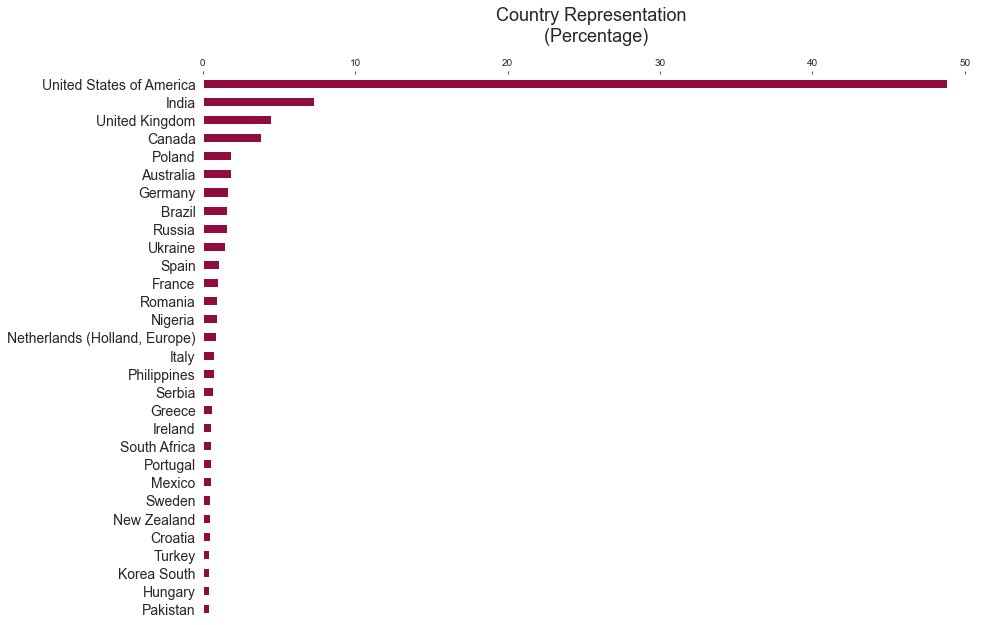

In [34]:
# Percentage of each country in dataframe
sns.set_style("white")
fig, ax = plt.subplots(figsize = (14, 10))
ax = (survey["CountryLive"].value_counts(normalize= True).head(30) * 100).plot(kind="barh", color = "#900C3F")
plt.title("Country Representation \n (Percentage)", size = 18, y = 1.05)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.yticks(size = 14)
plt.show()

A vast majority of respondents reside in the United States, followed by India at about 7 % and the United Kingdom at 5 %. Before making a decision, we need to find out how much are new programmers willing to spend on education. If we advertise in markets that are only interested in free learning we're unlikely to be profitable.

`MoneyForLearning` column describes the amount of money that survey participants have spent since the beginning of their programming journey. Since our business model operates on a monthly subscription we are interested in how much customers are willing to spend per month. To find that information we need to create a new column.

Formula: `MoneyForLearning` / `MonthsProgramming` 

We may need to limit our analysis to the following countries: US, India, UK, and Canada. Two reasons for this decision are:

* These countries have the highest frequency in the dataset
* The e-learning program is in English, and English is an official language in all these four countries. We'd like to maximize our chances of advertising to the right audience.


In [35]:
survey["MonthsProgramming"].value_counts().head(20)

1.0     1373
6.0     1371
12.0    1334
3.0     1273
2.0     1228
24.0     821
4.0      733
5.0      557
36.0     441
0.0      421
8.0      412
10.0     320
18.0     288
7.0      246
9.0      229
20.0     194
48.0     190
30.0     149
60.0     143
15.0     143
Name: MonthsProgramming, dtype: int64

To avoid dividing by zero, we'll need to change that particular value with 1. We can at least assume that respondents that answered with 0 months experience had probably just started and had only a few weeks of experience. For simplicity we'll change it to 1.

In [36]:
# Set new copy
spending = survey.copy()

# Replaces any instances of "zero months programming" (0) with (1) for proper calculation
spending["MonthsProgramming"] = spending["MonthsProgramming"].replace({0:1})

In [37]:
spending["MonthsProgramming"].describe()

count    12877.000000
mean        13.280345
std         27.082425
min          1.000000
25%          3.000000
50%          6.000000
75%         14.000000
max        744.000000
Name: MonthsProgramming, dtype: float64

In [38]:
# Calculates monthly spending by dividing money for learning with number of months programming
spending["Monthly_spending"] = spending["MoneyForLearning"] / spending["MonthsProgramming"]
spending["Monthly_spending"].value_counts(dropna=False)


0.000000        5769
NaN             1140
16.666667        297
50.000000        264
100.000000       246
                ... 
130.000000         1
80000.000000       1
76.000000          1
47.222222          1
1600.000000        1
Name: Monthly_spending, Length: 707, dtype: int64

In [39]:
# Total number of missing data points in monthly_spending column
spending["Monthly_spending"].isna().sum()

1140

In [40]:
# Drop missing data from following columns
spending = spending.dropna(subset=["CountryLive","Monthly_spending"])

# Groupby and calculate mean
avg_month = spending.groupby("CountryLive").mean()

# Shows only four countries selected below
avg_month["Monthly_spending"][["United States of America", "India","United Kingdom", "Canada"]]

CountryLive
United States of America    256.969675
India                       100.449884
United Kingdom               93.828988
Canada                      141.571630
Name: Monthly_spending, dtype: float64

Monthly spending in UK and Canada is rather low for countries with high GDP per capita. We didn't expect India to be the second highest spender out of these four countries. There might be some outliers that skew the results of this result, therefore we'll plot a boxplot for all four countries to determine if that is true.

In [41]:
# Assigns new variable for countries listed below
four_countries = spending[spending["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]

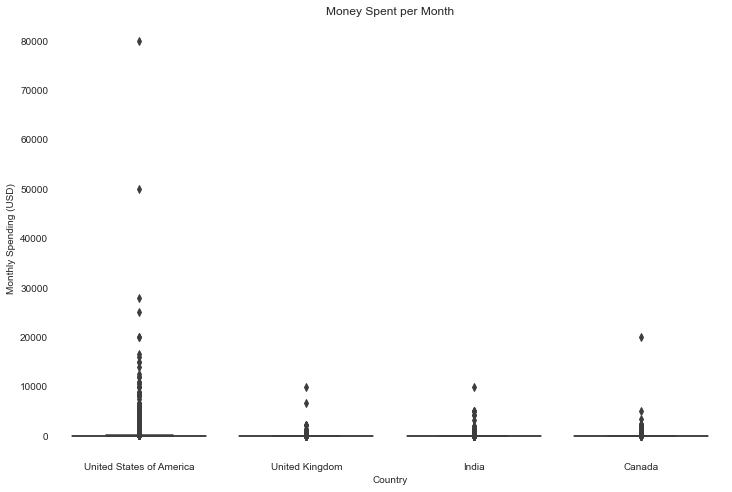

In [42]:
# Plot results of outliers in USA, India, UK, and Canada
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "CountryLive", y = "Monthly_spending", data = four_countries)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.xlabel("Country")
plt.ylabel("Monthly Spending (USD)")
plt.title("Money Spent per Month")
plt.show()

It's still difficult to tell if the data is wrong or not with so many outliers in each country. A few individuals reported spending over 20,000 USD per month, this may be that they attend programming bootcamps.

<AxesSubplot:ylabel='Monthly_spending'>

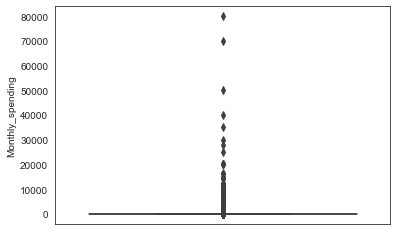

In [43]:
# Outliers in the entire monthly spending column
sns.boxplot(y = "Monthly_spending", data = spending)

In [44]:
# Group by programming boot camp attendance
# Only calculates mean of monthly spending
spending.groupby("AttendedBootcamp")["Monthly_spending"].mean()

AttendedBootcamp
0.0     125.080855
1.0    1407.750853
Name: Monthly_spending, dtype: float64

`AttendedBootcamp` values are in 0 or 1, while the metadata does not directly state which number is True or False, the general practice states 0 is False and 1 is True. In this survey it makes sense that if we group by this column we would generally see that if people attended a programming bootcamp, then their average monthly spending would be higher than people that did not attend a boot camp.

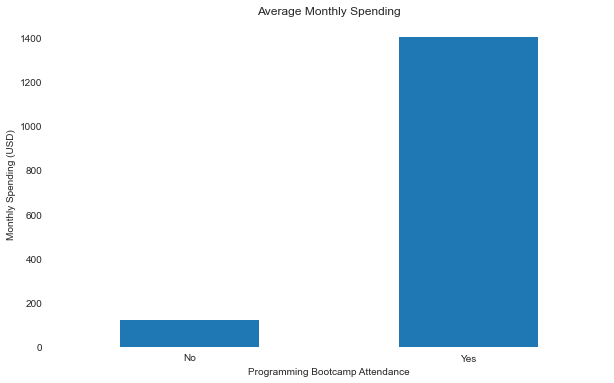

In [45]:
# Plot results of boot camp attendance and average monthly spending
fig, ax = plt.subplots(figsize = (10, 6))
ax = spending.groupby("AttendedBootcamp")["Monthly_spending"].mean().plot(kind = "bar")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)

# Change labels from 0 and 1 to "No" and "Yes" for easier comprehension
attendance = ["No", "Yes"]

ax.set_xticklabels(attendance)
plt.xticks(rotation = 0.4)
plt.title("Average Monthly Spending")
plt.ylabel("Monthly Spending (USD)")
plt.xlabel("Programming Bootcamp Attendance")
plt.show()

In [46]:
# Median monthly spending
spending.groupby("AttendedBootcamp")["Monthly_spending"].median()

AttendedBootcamp
0.0      0.833333
1.0    562.500000
Name: Monthly_spending, dtype: float64

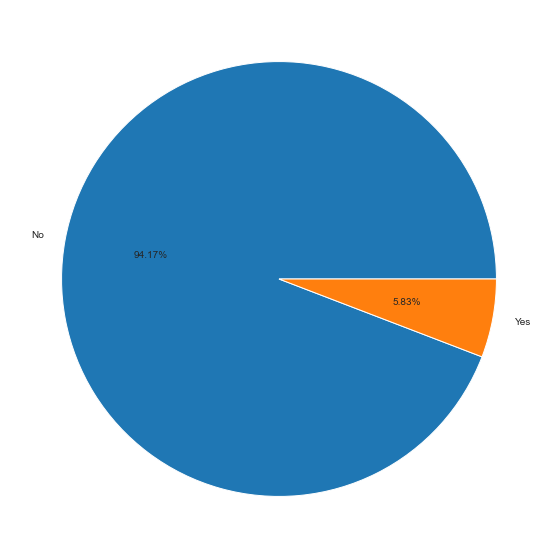

In [47]:
# Percentage of repsondents that attendend a programming bootcamp
boot_camp_att = spending["AttendedBootcamp"].value_counts(normalize=True) * 100

# Change labels from 0 and 1 to "No" and "Yes" for easier comprehension
labels = ["No", "Yes"]

# Plot results as pie chart
fig, ax = plt.subplots(figsize = (10,10))
plt.pie(boot_camp_att, labels = labels, autopct= "%.2f%%")
plt.show()

Less than 6 % of the respondents answered "Yes" to attending a programming bootcamp. Bootcamps can be expensive so it is no surprise that most people do not attend them. Is there a difference between the length of time that bootcamp attendees spend learning programming vs. those that do not?

In [48]:
spending.groupby("AttendedBootcamp")["MonthsProgramming"].mean()

AttendedBootcamp
0.0    13.358649
1.0    10.298954
Name: MonthsProgramming, dtype: float64

Regardless of bootcamp attendance, there seems to be little difference in the amount of time people have been programming. While individuals that reported not attending a bootcamp have been programming 1 month longer on average, there is not enough difference to come to a meaningful conclusion.

In [49]:
spending.groupby("AttendedBootcamp")["HoursLearning"].sum()

AttendedBootcamp
0.0    173740.0
1.0     20630.0
Name: HoursLearning, dtype: float64

In [50]:
spending.groupby("AttendedBootcamp")["HoursLearning"].mean()

AttendedBootcamp
0.0    16.483871
1.0    31.210287
Name: HoursLearning, dtype: float64

In [51]:
spending["Monthly_spending"].value_counts(bins = 20, normalize= True) * 100

(-80.001, 4000.0]     99.210412
(4000.0, 8000.0]       0.442516
(8000.0, 12000.0]      0.182213
(16000.0, 20000.0]     0.052061
(12000.0, 16000.0]     0.043384
(24000.0, 28000.0]     0.017354
(36000.0, 40000.0]     0.008677
(68000.0, 72000.0]     0.008677
(48000.0, 52000.0]     0.008677
(76000.0, 80000.0]     0.008677
(32000.0, 36000.0]     0.008677
(28000.0, 32000.0]     0.008677
(44000.0, 48000.0]     0.000000
(52000.0, 56000.0]     0.000000
(56000.0, 60000.0]     0.000000
(60000.0, 64000.0]     0.000000
(64000.0, 68000.0]     0.000000
(20000.0, 24000.0]     0.000000
(72000.0, 76000.0]     0.000000
(40000.0, 44000.0]     0.000000
Name: Monthly_spending, dtype: float64

* Generally, individuals that attended a programming bootcamp vs. non-attendees have spent about the same number of months programming
* Interestingly, the sum of hours learning for non-attendees is far greater than attendees
* However, the average number of hours spent learning programming for bootcamp attendees is over 10 hours more than non-attendees
* On average, people that reported bootcamp attendance spent far more than those that did not attend a bootcamp
* It's possible that the small number of boot camp attendees skews the data and makes it difficult for us to determine why average monthly spending in UK and Canada is low compared to US and India
* 99 % of respondents spent upwards of 4,000 USD per month, therefore we'll filter out any rows that exceed the amount of 4,000 and recalculate the country averages

In [52]:
# Isolate rows to include only monthly spending less than or equal to $4000
spending = spending[spending["Monthly_spending"] <= 4000]

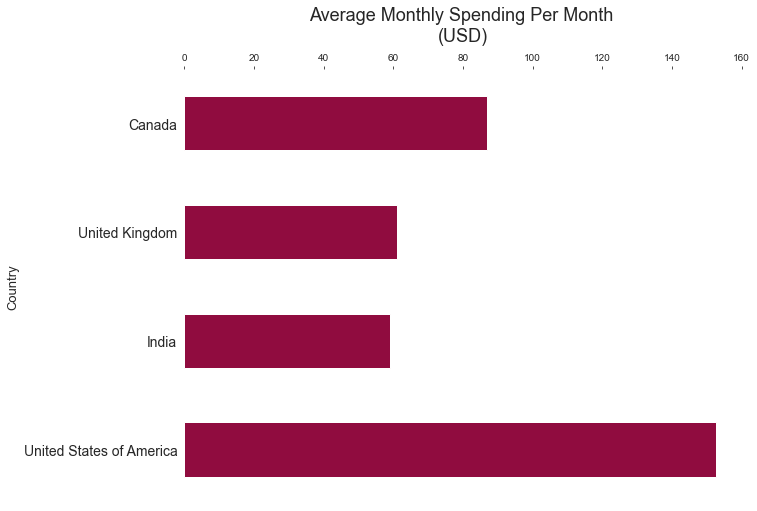

In [131]:
# Monthly average spending by country
avg_month = spending.groupby("CountryLive").mean()

# Plot results
fig, ax = plt.subplots(figsize = (10, 8))
avg_month["Monthly_spending"][["United States of America", "India","United Kingdom", "Canada"]].plot(kind = "barh", color = "#900C3F")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.title("Average Monthly Spending Per Month \n(USD)", y = 1.05, size = 18)
plt.yticks(size = 14)
plt.ylabel("Country", size = 13)
ax.xaxis.tick_top()
plt.show()

The United States should be our first choice for advertising:
* The US has the highest number of new programmers
* Highest average monthly spending for learning programming

India could be the second choice:
* Second highest new programmers
* While not the highest average monthly spending, the population of India is much higher than most countries, so the possibility of profitability

We could also send our results to the company's marketing team and allow them to decide, but we think these two picks are solid options for advertising our learning programs.

Now that we have an idea which markets we could advertise in, maybe we can explain why these four countries have the highest representation.

In [54]:
# Isolate rows from assigned variable four_countries
# Monthly spending is less than or equal to $4000 per month
# Re-assign to df
df = four_countries[four_countries["Monthly_spending"] <= 4000].reset_index(drop=True).copy()

### Age and Gender

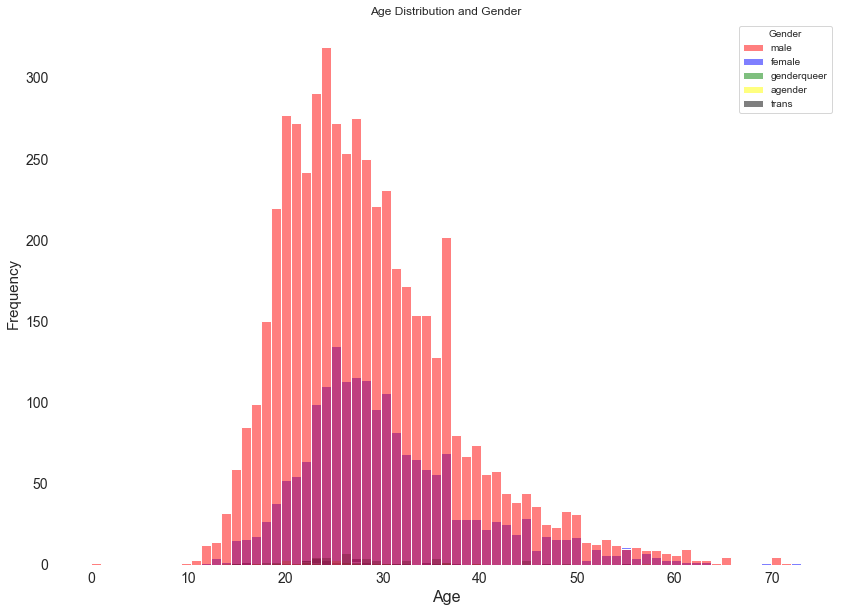

In [55]:
# Distribution of respondents by age and gender
fig, ax = plt.subplots(figsize = (14, 10))
palette = ["red", "blue", "green", "yellow", "black"]
ax = sns.histplot(x="Age", hue = "Gender", data = df, palette=palette)
plt.title("Age Distribution and Gender")
plt.ylabel("Frequency", size = 15)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.xlabel("Age", size = 16)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.show()

### Income
Respondents were asked their current yearly income.

Another important question that was asked was what their expected income was for their first developer job?

In [56]:
df["Income"].describe()

count      3792.000000
mean      42711.987605
std       28230.998768
min        6000.000000
25%       24000.000000
50%       38000.000000
75%       55000.000000
max      350000.000000
Name: Income, dtype: float64

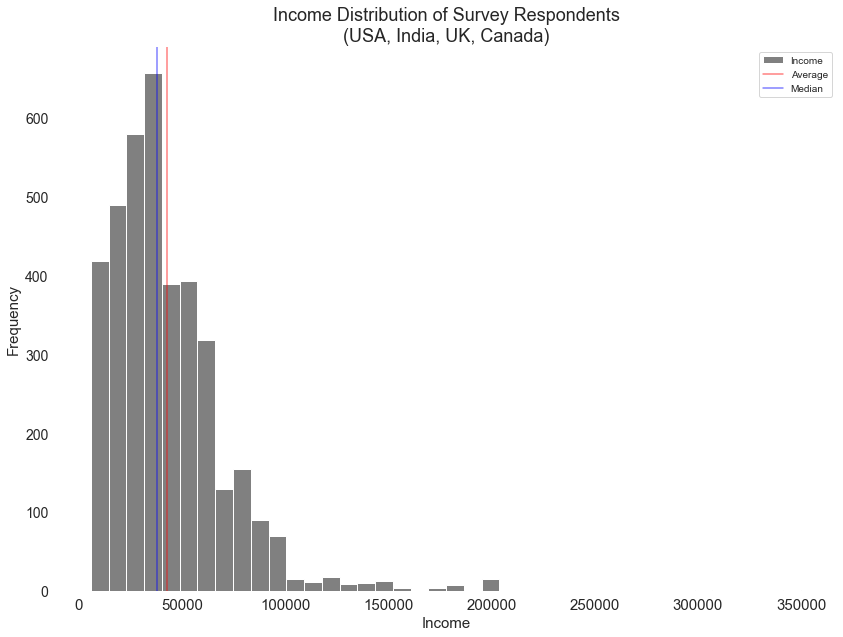

In [57]:
# Income distribution
fig, ax = plt.subplots(figsize = (14,10))
df["Income"].plot.hist(bins = 40, color = "grey")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.title("Income Distribution of Survey Respondents\n(USA, India, UK, Canada)", size = 18)
plt.axvline(df["Income"].mean(), color = "red", alpha = 0.5, label = "Average")
plt.axvline(df["Income"].median(), color = "blue", alpha = 0.5, label = "Median")
plt.ylabel("Frequency",size = 15)
plt.yticks(size = 14)
plt.xticks(size = 15)
plt.xlabel("Income", size = 15)
plt.legend()
plt.show()

Average and median income is close to about 40,000 USD per year.

In [58]:
# Isolating each country into individual dataframes
income_us = df[df["CountryLive"] == "United States of America"]
income_india = df[df["CountryLive"] == "India"]
income_uk = df[df["CountryLive"] == "United Kingdom"]
income_ca = df[df["CountryLive"] == "Canada"]

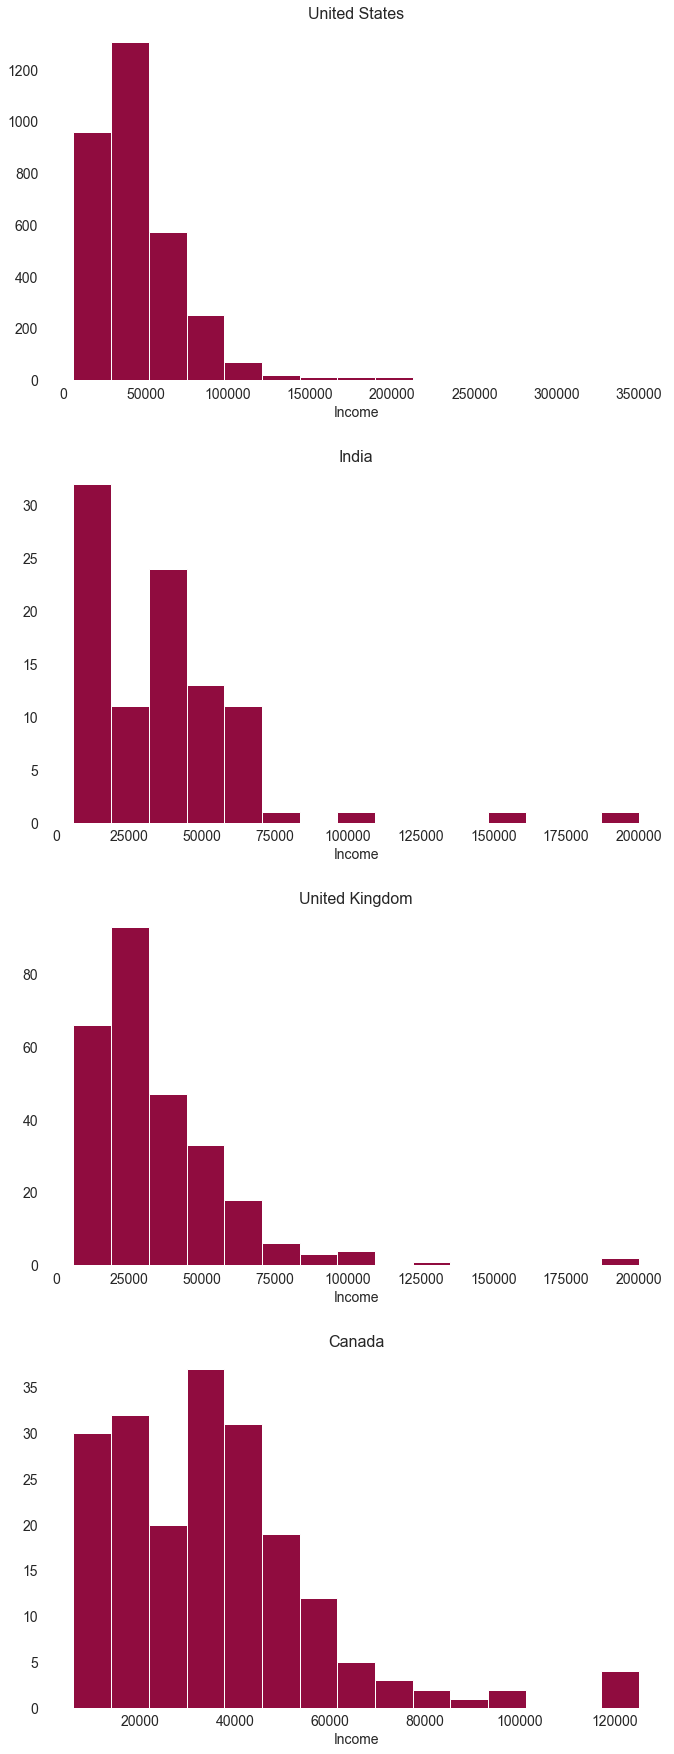

In [59]:
# Histogram for all four countries

# Figure and axes assignment
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(10,25))

axes = [ax1, ax2, ax3, ax4]

# Setting axes
for ax in axes:
    ax.set_xlabel("Income", size = 14)
    ax.tick_params(axis="both", labelsize= 14)
    for location in ["left", "right", "top", "bottom"]:
        ax.spines[location].set_visible(False)

ax1.hist(income_us["Income"], bins = 15, color = "#900C3F")
ax1.set_title("United States", size = 16)
ax2.hist(income_india["Income"], bins = 15, color = "#900C3F")
ax2.set_title("India", size = 16)
ax3.hist(income_uk["Income"], bins = 15, color = "#900C3F")
ax3.set_title("United Kingdom", size = 16)
ax4.hist(income_ca["Income"], bins = 15, color = "#900C3F")
ax4.set_title("Canada", size = 16)

fig.tight_layout(pad=3)
plt.show()

In [114]:
df["ExpectedEarning"].isna().sum()

432

In [124]:
df["ExpectedEarning"].describe()

count       7037.000000
mean       61186.883615
std        48412.003632
min         6000.000000
25%        45000.000000
50%        60000.000000
75%        70000.000000
max      1000000.000000
Name: ExpectedEarning, dtype: float64

Generally, survey participants stated they expected to earn around 61,000 USD, one person stated they hoped for 1,000,000. Without any plotting we can already see that the current median and average income is less than the expected income. Respondents expect to earn about 33 % more at their first developer job than at their current job, but this percentage is merely a result of the increase from the average current income, and on an individual basis it is expected to vary.

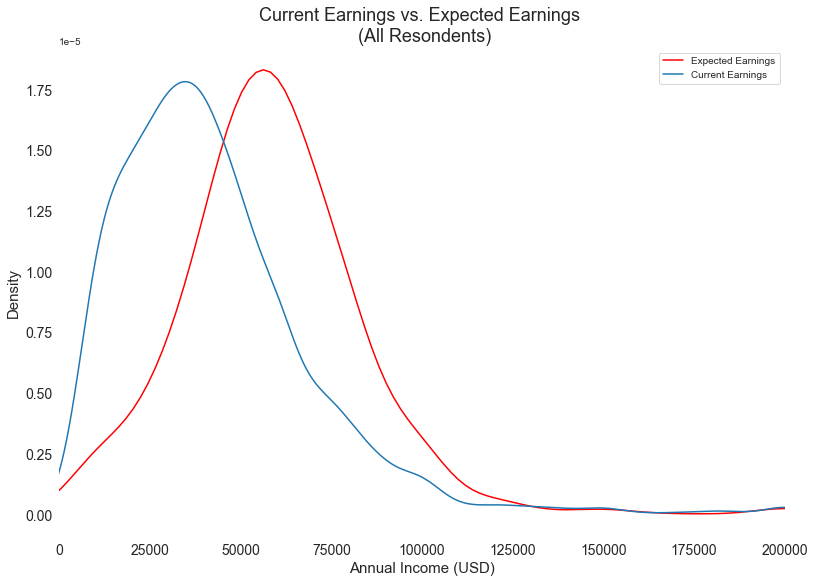

In [150]:
# Difference between current income and expected income
fig, ax = plt.subplots(figsize = (13,9))
df["ExpectedEarning"].plot.kde(xlim = (0, 200000), color = "red", label = "Expected Earnings")
df["Income"].plot.kde(label = "Current Earnings")
plt.title("Current Earnings vs. Expected Earnings \n (All Resondents)", size = 18)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.ylabel("Density", size = 15)
plt.xlabel("Annual Income (USD)", size = 15)
plt.legend()
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.show()

We can find each person's desired income percentage increase by utilizing the following formula

*Increase = New Number - Original Number*

*% increase = Increase / Original Number x 100*

Since we have missing data points in both columns we expect to see negative percentages in the new column that we create. Missing data won't be dropped, instead we'll ignore any percentages below 0.

In [151]:
# Column creation using formula above
df["Percent_Increase"] = (df["ExpectedEarning"] - df["Income"]) / df["Income"] * 100
df["Percent_Increase"].value_counts(bins = 20, normalize= True) * 100

(-106.658, 742.833]       48.145669
(742.833, 1575.667]        0.696211
(1575.667, 2408.5]         0.053555
(15733.833, 16566.667]     0.026777
(4074.167, 4907.0]         0.013389
(14068.167, 14901.0]       0.013389
(3241.333, 4074.167]       0.000000
(4907.0, 5739.833]         0.000000
(5739.833, 6572.667]       0.000000
(6572.667, 7405.5]         0.000000
(7405.5, 8238.333]         0.000000
(2408.5, 3241.333]         0.000000
(9071.167, 9904.0]         0.000000
(9904.0, 10736.833]        0.000000
(10736.833, 11569.667]     0.000000
(11569.667, 12402.5]       0.000000
(12402.5, 13235.333]       0.000000
(13235.333, 14068.167]     0.000000
(14901.0, 15733.833]       0.000000
(8238.333, 9071.167]       0.000000
Name: Percent_Increase, dtype: float64

In [127]:
df["Percent_Increase"].describe()

count     3656.000000
mean       118.342783
std        492.705755
min        -90.000000
25%         11.111111
50%         48.074074
75%        114.285714
max      16566.666667
Name: Percent_Increase, dtype: float64

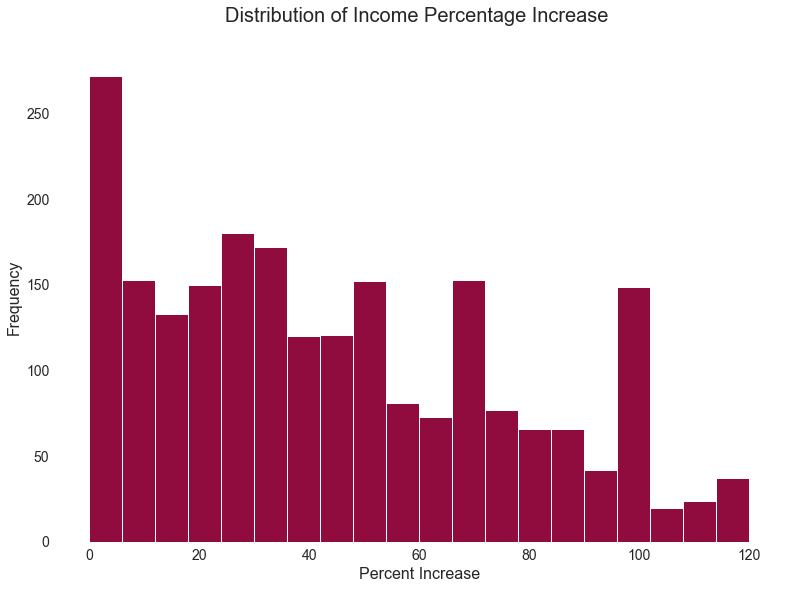

In [178]:
# Expected Income 
fig, ax = plt.subplots(figsize = (13,9))
df[(df["Percent_Increase"] <= 120) & (df["Percent_Increase"] >= 0)]["Percent_Increase"].plot.hist(bins = 20, color = "#900C3F")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.title("Distribution of Income Percentage Increase ", size = 20, y = 1.05)
plt.ylabel("Frequency", size = 16)
plt.xlabel("Percent Increase", size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

Most people expect a 5 % wage increase if they are able to secure a job as a software developer or related field.

### Education Levels and the Time Spent Learning 
Does education influence the number of hours learning?
Respondents were asked to state the highest level of education completed.

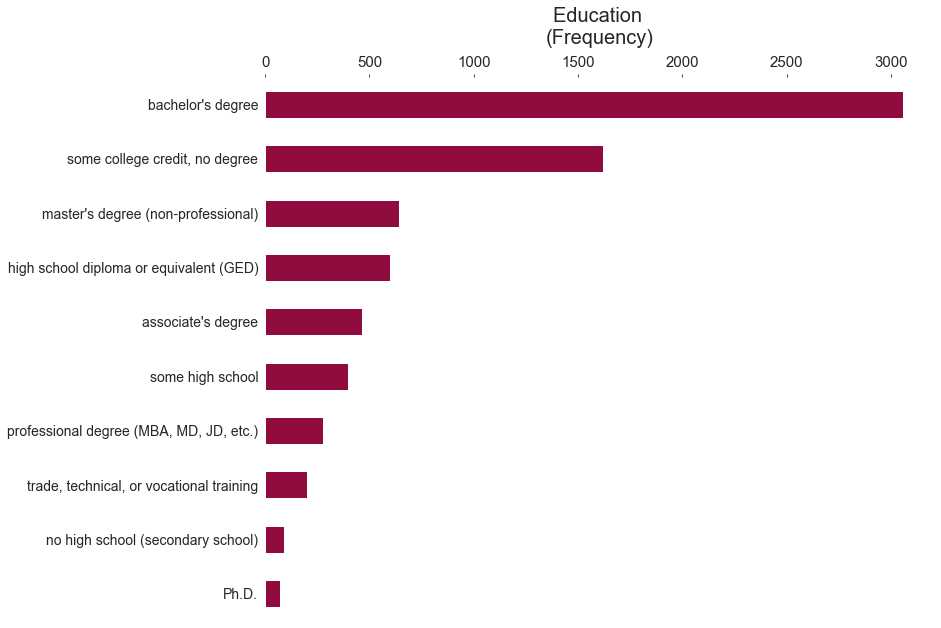

In [60]:
fig, ax = plt.subplots(figsize = (12, 10))
ax = df["SchoolDegree"].value_counts().plot(kind = "barh", color = "#900C3F")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.title("Education \n(Frequency)", size = 20, y = 1.05)
plt.xticks(size = 15)
plt.yticks(size = 14)
plt.show()

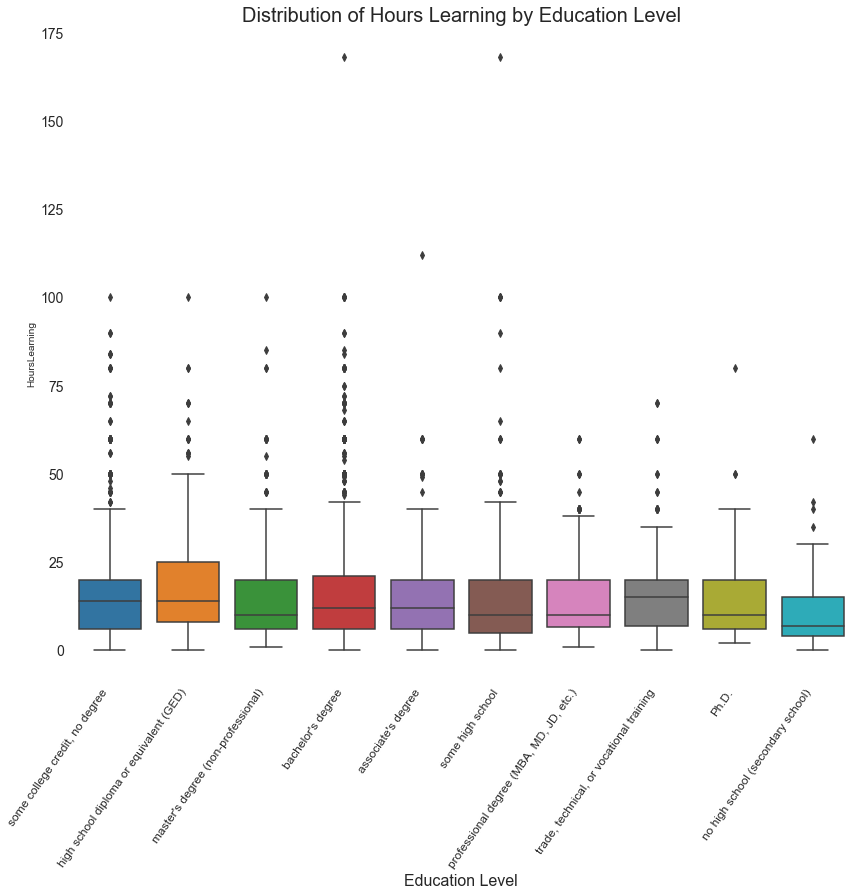

In [61]:
plt.subplots(figsize = (14, 12))
sns.boxplot(x = "SchoolDegree", y = "HoursLearning", data = df, dodge=True, palette= "tab10")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.xticks(ha="right", rotation=55, size = 12)
plt.title("Distribution of Hours Learning by Education Level", size = 20)
plt.yticks(size =14)
plt.xlabel("Education Level", size = 16)
plt.show()

Based on education level, the distribution of hours spent learning is mostly equal. The highest level of education achieved does not seem to influence the range of hours spent learning too greatly.

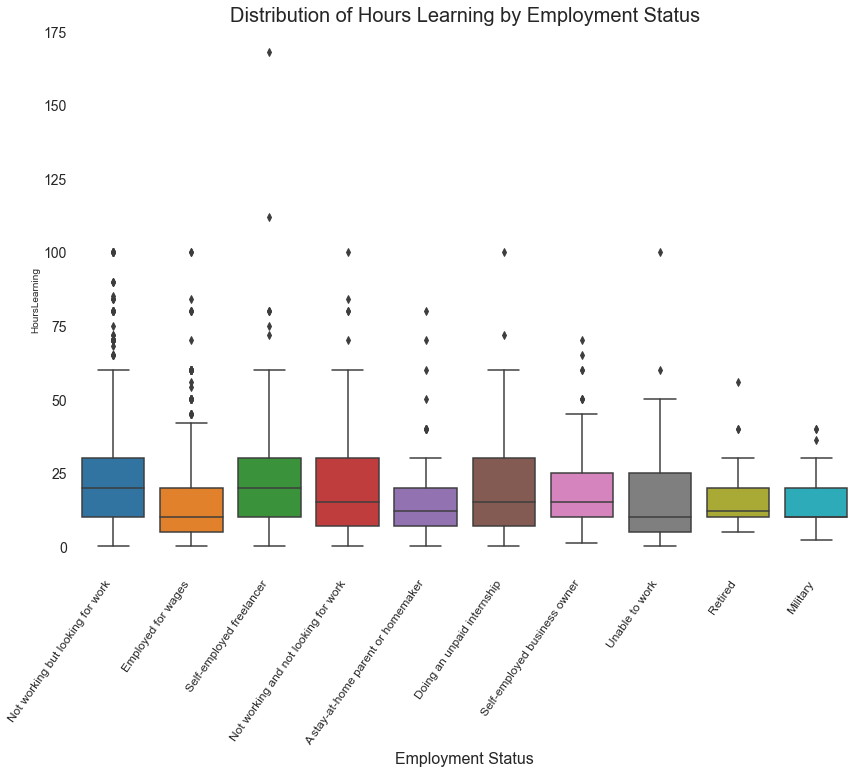

In [62]:
plt.subplots(figsize = (14, 10))
sns.boxplot(x = "EmploymentStatus", y = "HoursLearning", data = df, dodge=True, palette= "tab10")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.xticks(ha="right", rotation=55, size = 12)
plt.title("Distribution of Hours Learning by Employment Status", size = 20)
plt.yticks(size =14)
plt.xlabel("Employment Status", size = 16)
plt.show()

* Employment status has more variation in the distribution of hours learning across each employment type compared to education level
* Individuals with bachelor's degrees have the highest frequency of survey participation
* People with high school diplomas have the greatest distribution of hours learning per week
* Unemployed job seekers, self-employed freelancers, and individuals in unpaid internships have the largest distribution of learning hours compared to other employment statuses
* Unemployed individuals not looking for work have a large distribution of hours learning, why is that?

In [63]:
#non_job_seekers = df[df["EmploymentStatus"] == "Not working and not looking for work"]
#non_job_seekers["JobRoleInterest"].value_counts()

In [64]:
#non_job_seekers["SchoolMajor"].value_counts(dropna=False).head(30)

In [65]:
#fig, ax = plt.subplots(figsize = (12, 10))
df.groupby("EmploymentStatus")["HoursLearning"].mean().sort_values(ascending= False)

EmploymentStatus
Not working but looking for work        22.871004
Self-employed freelancer                21.895238
Self-employed business owner            19.387387
Doing an unpaid internship              19.372093
Not working and not looking for work    19.136564
Retired                                 18.052632
Unable to work                          16.461538
A stay-at-home parent or homemaker      16.048000
Military                                15.310345
Employed for wages                      12.948090
Name: HoursLearning, dtype: float64

The majority of people that are unemployed and not currently looking for work do not have a college degree, and the most of them are interested in front end web development. In addtion, this group has one of the highest average hours learning per week (19 hours). 

People in employment types that might utilize programming/web development seem to spend more time each week on average studying than not. In contrast employment types such as stay at home parent, military, or employee with less time during the week tend to spend less time learning programming.

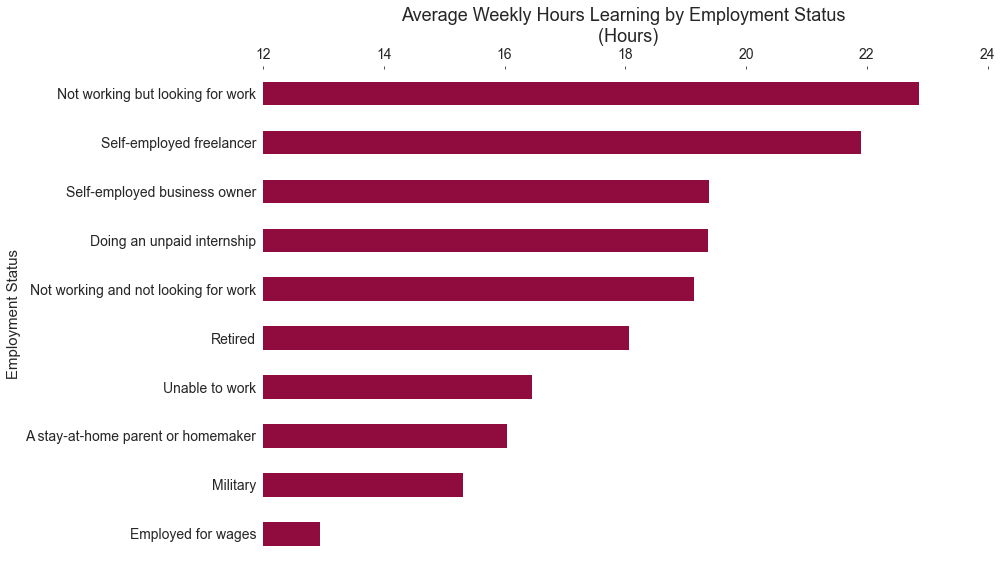

In [66]:
fig, ax = plt.subplots(figsize = (13, 9))
df.groupby("EmploymentStatus")["HoursLearning"].mean().sort_values(ascending= False).plot(kind = "barh", xlim = (12), color = "#900C3F")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.title("Average Weekly Hours Learning by Employment Status \n (Hours)", size = 18)
plt.xticks(size = 14)
plt.ylabel("Employment Status", size = 15)
plt.yticks(size = 14)
plt.show()

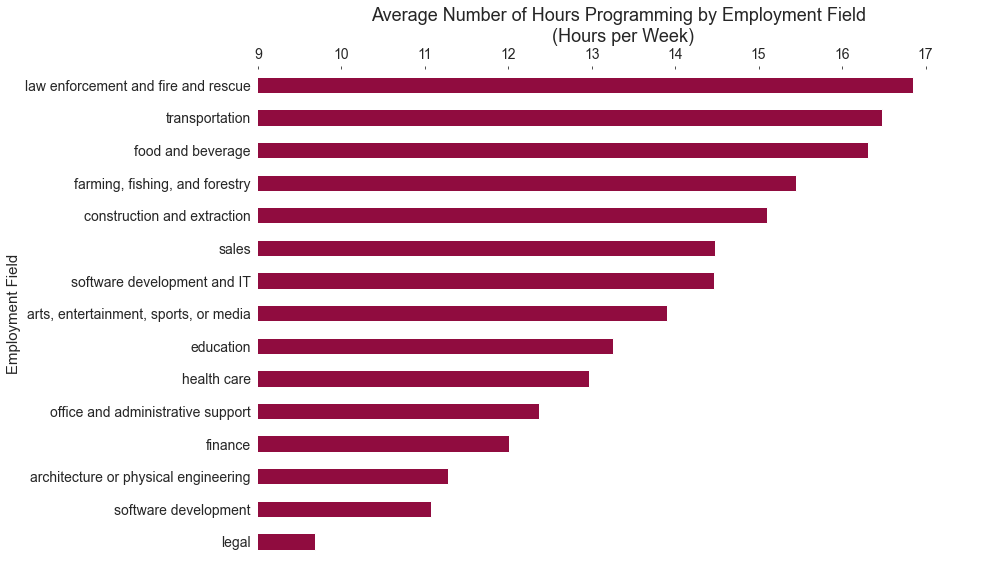

In [67]:
fig, ax = plt.subplots(figsize = (13,9))
ax = df.groupby("EmploymentField")["HoursLearning"].mean().sort_values(ascending=False).plot(kind = "barh", xlim=(9), color = "#900C3F")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.title("Average Number of Hours Programming by Employment Field \n (Hours per Week)", size = 18)
plt.xticks(size = 14)
plt.ylabel("Employment Field", size = 15)
plt.yticks(size = 14)
plt.show()

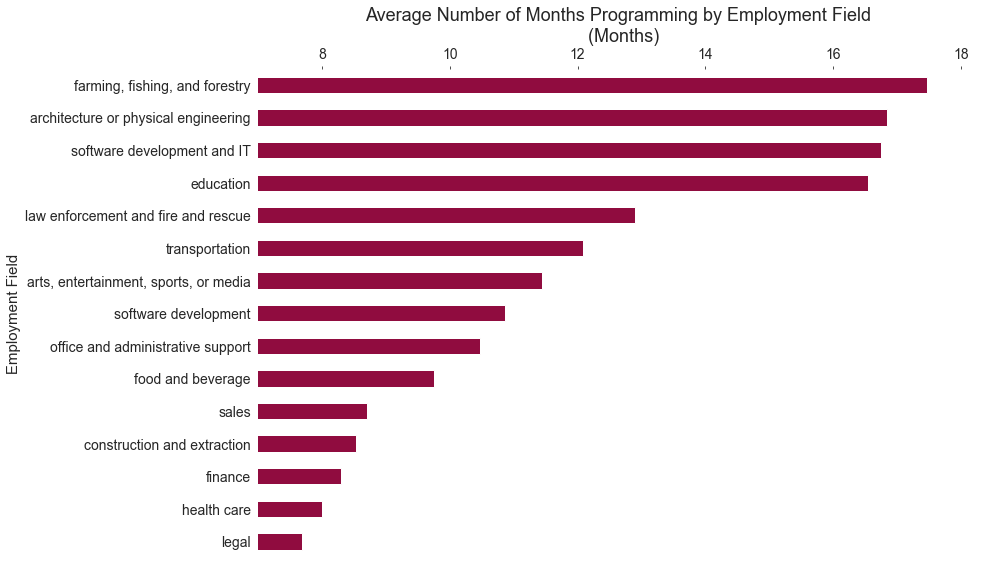

In [68]:
fig, ax = plt.subplots(figsize = (13,9))
ax = df.groupby("EmploymentField")["MonthsProgramming"].mean().sort_values(ascending=False).plot(kind = "barh", xlim=(7), color = "#900C3F")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.title("Average Number of Months Programming by Employment Field \n (Months)", size = 18)
plt.xticks(size = 14)
plt.ylabel("Employment Field", size = 15)
plt.yticks(size = 14)
plt.show()

In [69]:
# Aggregates average hours spent learning by education level followed by employment field
# Pivot table grouped by education and employment
df.pivot_table("HoursLearning", ["SchoolDegree", "EmploymentField"], aggfunc= np.mean).sort_values(by = "HoursLearning", ascending = False).head(15)

,,HoursLearning
SchoolDegree,EmploymentField,
some high school,education,47.000000
Ph.D.,software development and IT,33.333333
master's degree (non-professional),law enforcement and fire and rescue,30.000000
no high school (secondary school),architecture or physical engineering,30.000000
"professional degree (MBA, MD, JD, etc.)",architecture or physical engineering,25.000000
associate's degree,law enforcement and fire and rescue,25.000000
no high school (secondary school),software development and IT,24.750000
associate's degree,transportation,23.583333
"trade, technical, or vocational training",education,23.333333


In [70]:
df.pivot_table("HoursLearning", ["SchoolDegree", "EmploymentField"], aggfunc= np.mean).sort_values(by = "HoursLearning", ascending = False).tail(15)

,,HoursLearning
SchoolDegree,EmploymentField,
"trade, technical, or vocational training",finance,8.000000
some high school,"arts, entertainment, sports, or media",8.000000
master's degree (non-professional),architecture or physical engineering,7.157895
some high school,office and administrative support,7.000000
Ph.D.,construction and extraction,7.000000
no high school (secondary school),"arts, entertainment, sports, or media",6.000000
Ph.D.,finance,6.000000
associate's degree,legal,5.000000
"professional degree (MBA, MD, JD, etc.)",transportation,5.000000


In [71]:
df["MonthsProgramming"].describe()

count    7469.000000
mean       13.470880
std        28.590296
min         1.000000
25%         3.000000
50%         6.000000
75%        14.000000
max       744.000000
Name: MonthsProgramming, dtype: float64

In [72]:
df[df["MonthsProgramming"] <=20]["MonthsProgramming"].describe()

count    6095.000000
mean        6.244627
std         4.922208
min         1.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        20.000000
Name: MonthsProgramming, dtype: float64

<AxesSubplot:ylabel='MonthsProgramming'>

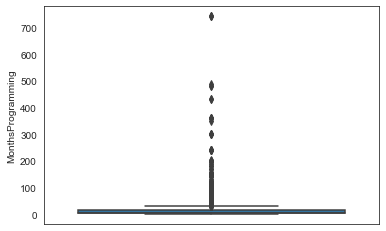

In [73]:
# Outliers
sns.boxplot(y = "MonthsProgramming", data = df)

The average person has spent about 13 to 14 months programming, whereas the median number of months spent programming is 6 months.
We can see that the data is heavily skewed to the right with many individuals with hundreds of months programming.

In [74]:
df.groupby("SchoolDegree")["MonthsProgramming"].mean().sort_values(ascending=False)

SchoolDegree
Ph.D.                                       27.123288
some high school                            15.366162
high school diploma or equivalent (GED)     14.465000
associate's degree                          14.360515
master's degree (non-professional)          14.027950
some college credit, no degree              13.795679
bachelor's degree                           12.884565
trade, technical, or vocational training    10.885572
professional degree (MBA, MD, JD, etc.)     10.448029
no high school (secondary school)            9.193182
Name: MonthsProgramming, dtype: float64

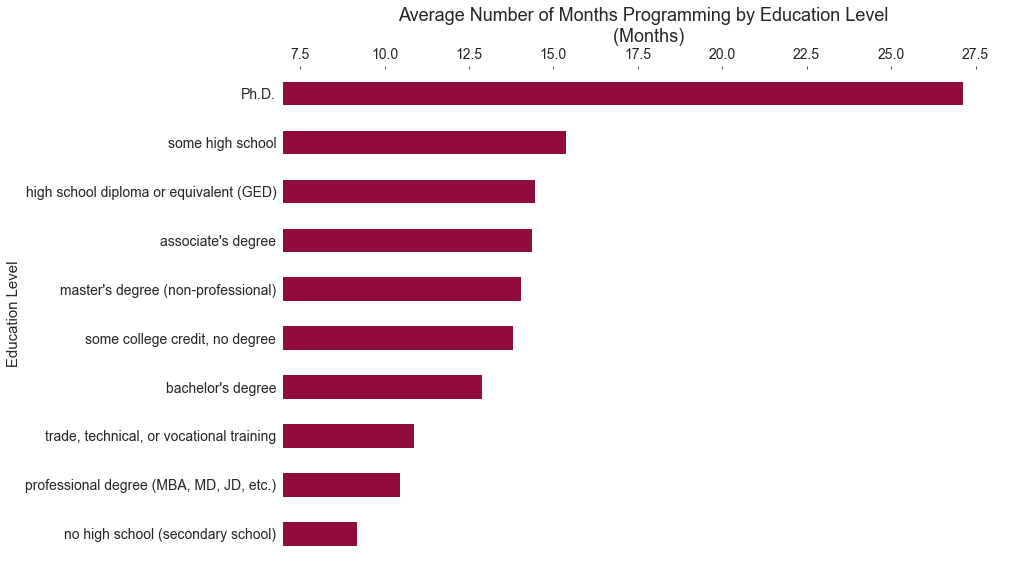

In [75]:
fig, ax = plt.subplots(figsize = (13,9))
ax = df.groupby("SchoolDegree")["MonthsProgramming"].mean().sort_values(ascending=False).plot(kind = "barh", xlim=(7), color = "#900C3F")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.title("Average Number of Months Programming by Education Level \n (Months)", size = 18)
plt.xticks(size = 14)
plt.ylabel("Education Level", size = 15)
plt.yticks(size = 14)
plt.show()

Why do people with Ph.D.s have more experience programming?

In [76]:
df[df["SchoolDegree"] == "Ph.D."]["EmploymentField"].value_counts(dropna=False)

NaN                                      32
education                                24
health care                               4
software development and IT               3
arts, entertainment, sports, or media     3
architecture or physical engineering      2
finance                                   2
transportation                            1
construction and extraction               1
food and beverage                         1
Name: EmploymentField, dtype: int64

In [77]:
df[df["SchoolDegree"] == "Ph.D."]["MonthsProgramming"].describe()

count     73.000000
mean      27.123288
std       69.743766
min        1.000000
25%        4.000000
50%        8.000000
75%       14.000000
max      480.000000
Name: MonthsProgramming, dtype: float64

In [78]:
phd = df[df["SchoolDegree"] == "Ph.D."]
phd[phd["MonthsProgramming"] > 15]

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,JobRoleInterest,BootcampFinish,ExpectedEarning,Year,Monthly_spending
177,27.0,0.0,"between 100,000 and 1 million",NaN,Czech Republic,United Kingdom,NaN,Not working but looking for work,female,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,I'm already applying,work for a nonprofit,in an office with other developers,Czech,"single, never married",0.0,54.0,Ph.D.,Psychology,[ Data Scientist],NaN,NaN,2017,0.000000
218,30.0,1.0,"between 100,000 and 1 million",15 to 29 minutes,United States of America,United States of America,NaN,Employed for wages,male,0.0,0.0,1.0,0.0,20.0,10000.0,1.0,0.0,0.0,1.0,I haven't decided,work for a medium-sized company,no preference,Tamil,"single, never married",5500.0,24.0,Ph.D.,Chemistry,[ Data Scientist],1.0,140000.0,2017,229.166667
972,38.0,0.0,"between 100,000 and 1 million",15 to 29 minutes,United States of America,United States of America,education,Employed for wages,female,1.0,1.0,1.0,0.0,5.0,78000.0,0.0,0.0,0.0,0.0,I haven't decided,work for a nonprofit,no preference,English,married or domestic partnership,0.0,120.0,Ph.D.,Information Systems,"[ Product Manager, Quality Assurance Engineer]",NaN,95000.0,2017,0.000000
1507,38.0,0.0,"between 100,000 and 1 million",Less than 15 minutes,United States of America,United States of America,education,Employed for wages,male,0.0,0.0,1.0,0.0,5.0,38000.0,0.0,0.0,0.0,0.0,I haven't decided,work for a nonprofit,in an office with other developers,English,"single, never married",0.0,36.0,Ph.D.,History,"[Back-End Web Developer, Front-End Web Develop...",NaN,NaN,2017,0.000000
1677,34.0,0.0,"less than 100,000",NaN,Russia,United States of America,NaN,A stay-at-home parent or homemaker,female,0.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,more than 12 months from now,work for a nonprofit,in an office with other developers,Russian,married or domestic partnership,0.0,48.0,Ph.D.,Chemistry,"[Back-End Web Developer, Front-End Web Develop...",NaN,70000.0,2017,0.000000
1723,53.0,NaN,"less than 100,000",Less than 15 minutes,United States of America,United States of America,education,Employed for wages,male,1.0,1.0,1.0,0.0,2.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,English,married or domestic partnership,0.0,48.0,Ph.D.,Sociology,[ Data Scientist],NaN,NaN,2017,0.000000
1876,31.0,0.0,"less than 100,000",15 to 29 minutes,United States of America,United States of America,education,Employed for wages,male,1.0,0.0,1.0,0.0,20.0,50000.0,1.0,0.0,0.0,0.0,Within the next 6 months,work for a medium-sized company,in an office with other developers,English,"single, never married",200.0,84.0,Ph.D.,Physics,"[Back-End Web Developer, Game Developer, DevOp...",NaN,90000.0,2017,2.380952
2201,35.0,0.0,"less than 100,000",Less than 15 minutes,United States of America,United States of America,education,Employed for wages,male,1.0,1.0,1.0,0.0,10.0,36000.0,0.0,0.0,0.0,0.0,I'm already applying,work for a medium-sized company,in an office with other developers,English,married or domestic partnership,0.0,54.0,Ph.D.,Physics,"[ Data Scientist, Information Security, Game ...",NaN,70000.0,2017,0.000000
2219,27.0,0.0,"between 100,000 and 1 million",45 to 60 minutes,United Kingdom,United Kingdom,finance,Employed for wages,female,0.0,0.0,1.0,0.0,2.0,45000.0,0.0,0.0,0.0,1.0,Within 7 to 12 months,work for a startup,in an office with other developers,English,married or domestic partnership,0.0,24.0,Ph.D.,Mathematics,[ Front-End Web Developer],NaN,60000.0,2017,0.000000
2476,36.0,0.0,more than 1 million,Less than 15 minutes,United States of America,United States of America,transportation,Self-employed freelancer,male,1.0,0.0,1.0,0.0,20.0,28

In [79]:
phd["EmploymentField"].value_counts(dropna=False)

NaN                                      32
education                                24
health care                               4
software development and IT               3
arts, entertainment, sports, or media     3
architecture or physical engineering      2
finance                                   2
transportation                            1
construction and extraction               1
food and beverage                         1
Name: EmploymentField, dtype: int64

Respondents with PhDs typically reported they were currently employed, most did not specify their Job field they were in. If we disregared missing values for the `EmploymentField` for these outliers, the vast majority (24 people) reported working in education

If we look at the average (50,000 USD) and median (41,000 USD) salaries for education we see it is rather low for PhD holders. 

In [80]:
phd["EmploymentStatus"].value_counts(dropna=False)

Employed for wages                    45
Not working but looking for work      14
Self-employed freelancer               5
Self-employed business owner           3
NaN                                    2
A stay-at-home parent or homemaker     2
Retired                                1
Unable to work                         1
Name: EmploymentStatus, dtype: int64

In [81]:
print("Average Income: ", phd[phd["MonthsProgramming"] > 15]["Income"].mean())
print("Median Incomme: ", phd[phd["MonthsProgramming"] > 15]["Income"].median())

Average Income:  43125.0
Median Incomme:  42500.0


In [82]:
phd.groupby("EmploymentField")["Income"].mean().sort_values(ascending=False)

EmploymentField
finance                                  77500.000000
health care                              60000.000000
software development and IT              51666.666667
education                                50347.826087
construction and extraction              45000.000000
arts, entertainment, sports, or media    44500.000000
food and beverage                        36000.000000
architecture or physical engineering     30000.000000
transportation                           28000.000000
Name: Income, dtype: float64

In [83]:
phd.groupby("EmploymentField")["Income"].median().sort_values(ascending=False)

EmploymentField
finance                                  77500.0
health care                              62500.0
software development and IT              60000.0
construction and extraction              45000.0
arts, entertainment, sports, or media    44500.0
education                                41000.0
food and beverage                        36000.0
architecture or physical engineering     30000.0
transportation                           28000.0
Name: Income, dtype: float64

In [84]:
phd[phd["EmploymentField"] == "education"]["JobRoleInterest"].head(30)

609     [  Front-End Web Developer, Product Manager, U...
972       [  Product Manager, Quality Assurance Engineer]
1214    [Full-Stack Web Developer, Back-End Web Develo...
1392    [  Mobile Developer, Full-Stack Web Developer,...
1507    [Back-End Web Developer, Front-End Web Develop...
1723                                   [  Data Scientist]
1876    [Back-End Web Developer, Game Developer, DevOp...
2151    [  User Experience Designer, Data Engineer, Ba...
2201    [  Data Scientist, Information Security, Game ...
2591                                [Digital Humanitites]
2899    [  Front-End Web Developer, Product Manager, I...
3476    [  Product Manager, Full-Stack Web Developer, ...
3778                           [Full-Stack Web Developer]
3932                           [Full-Stack Web Developer]
4147                   [  Data Scientist / Data Engineer]
5340                             [Back-End Web Developer]
6099                           [Full-Stack Web Developer]
6179          

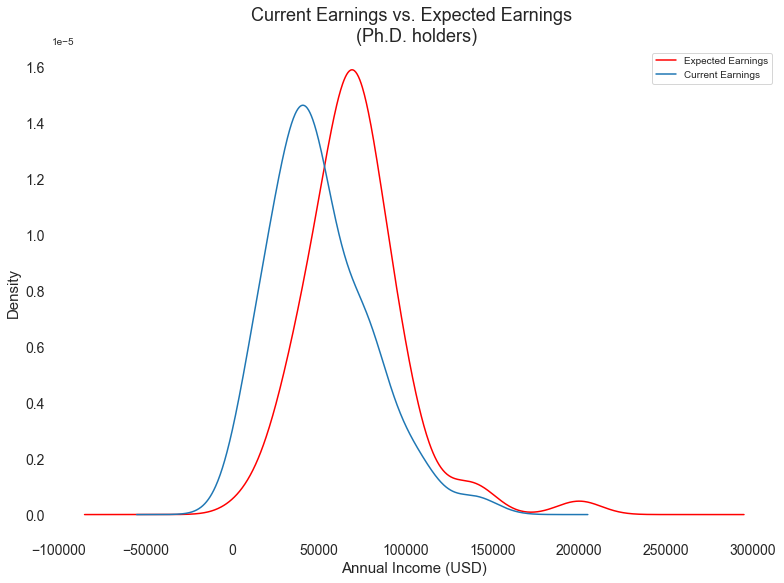

In [110]:
fig, ax = plt.subplots(figsize = (13, 9))
phd["ExpectedEarning"].plot.kde(label= "Expected Earnings", color = "red")
phd["Income"].plot.kde(label = "Current Earnings")
plt.title("Current Earnings vs. Expected Earnings \n (Ph.D. holders)", size = 18)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.ylabel("Density", size = 15)
plt.xlabel("Annual Income (USD)", size = 15)
plt.legend()
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.show()


The plot above explains the difference in current salary and expected salary. The peak of both lines indicates the highest probability of sampling a random value from either column at the specific income amount. We can also look at this like a histogram. The peak of the lines indicates the most numerous value.
Ph.D. holders have an average salary of 43,000 USD, and it appears most of them expect to earn about 70,000 to 80,000 USD in a new field. From this visualization we may infer a reason for Ph.D. holders to be learning a new skill outside of their current employment field. Their current pay is significant less than what they expect to earn from a software developer position.

In [85]:
phd

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,JobRoleInterest,BootcampFinish,ExpectedEarning,Year,Monthly_spending
177,27.0,0.0,"between 100,000 and 1 million",NaN,Czech Republic,United Kingdom,NaN,Not working but looking for work,female,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,I'm already applying,work for a nonprofit,in an office with other developers,Czech,"single, never married",0.0,54.0,Ph.D.,Psychology,[ Data Scientist],NaN,NaN,2017,0.000000
183,32.0,0.0,"between 100,000 and 1 million",I work from home,Canada,Canada,software development and IT,Self-employed freelancer,male,0.0,0.0,1.0,0.0,40.0,20000.0,0.0,0.0,0.0,0.0,Within the next 6 months,work for a medium-sized company,from home,English,married or domestic partnership,40.0,12.0,Ph.D.,Mathematics,"[Full-Stack Web Developer, Front-End Web Devel...",NaN,40000.0,2017,3.333333
218,30.0,1.0,"between 100,000 and 1 million",15 to 29 minutes,United States of America,United States of America,NaN,Employed for wages,male,0.0,0.0,1.0,0.0,20.0,10000.0,1.0,0.0,0.0,1.0,I haven't decided,work for a medium-sized company,no preference,Tamil,"single, never married",5500.0,24.0,Ph.D.,Chemistry,[ Data Scientist],1.0,140000.0,2017,229.166667
431,33.0,0.0,"between 100,000 and 1 million",NaN,United Kingdom,United Kingdom,NaN,Not working but looking for work,female,1.0,0.0,1.0,0.0,20.0,NaN,0.0,0.0,0.0,NaN,I'm already applying,work for a medium-sized company,in an office with other developers,English,married or domestic partnership,60.0,10.0,Ph.D.,Chemistry,"[ Data Scientist, Front-End Web Developer, Ba...",NaN,30000.0,2017,6.000000
537,46.0,0.0,more than 1 million,NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,0.0,1.0,0.0,50.0,NaN,0.0,0.0,0.0,NaN,I'm already applying,NaN,in an office with other developers,English,married or domestic partnership,2000.0,5.0,Ph.D.,Music Theory and Composition,[Full-Stack Web Developer],NaN,75000.0,2017,400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6956,46.0,0.0,"less than 100,000",40.0,United States of America,United States of America,education,Employed for wages,male,1.0,1.0,1.0,0.0,12.0,40000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a medium-sized company,no preference,English,married or domestic partnership,0.0,12.0,Ph.D.,Music,[ Mobile Developer],NaN,80000.0,2016,0.000000
6986,46.0,0.0,"between 100,000 and 1 million",180.0,United States of America,United States of America,education,Employed for wages,male,1.0,1.0,1.0,0.0,10.0,80000.0,0.0,0.0,0.0,1.0,Within 7 to 12 months,work for a medium-sized company,in an office with other developers,English,married or domestic partnership,500.0,12.0,Ph.D.,Philosophy,[ Data Scientist / Data Engineer],NaN,60000.0,2016,41.666667
7304,46.0,0.0,"between 100,000 and 1 million",180.0,United States of America,United States of America,education,Employed for wages,male,1.0,1.0,1.0,0.0,10.0,80000.0,0.0,0.0,0.0,1.0,Within 7 to 12 months,work for a medium-sized company,no preference,English,married or domestic partnership,1500.0,4.0,Ph.D.,Philosophy,[ Data Scientist / Data Engineer],NaN,60000.0,2016,375.000000
7359,35.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,A stay-at-home parent or homemaker,genderqueer,1.0,1.0,1.0,1.0,2.0,NaN,0.0,1.0,0.0,NaN,I'm already applying,work for a multinational corporation,from home,Swahili,widowed,0.0,1.0,Ph.D.,Agricultural Mechanics and Machinery,[ Product Manager],NaN,200000.0,2016,0.000000


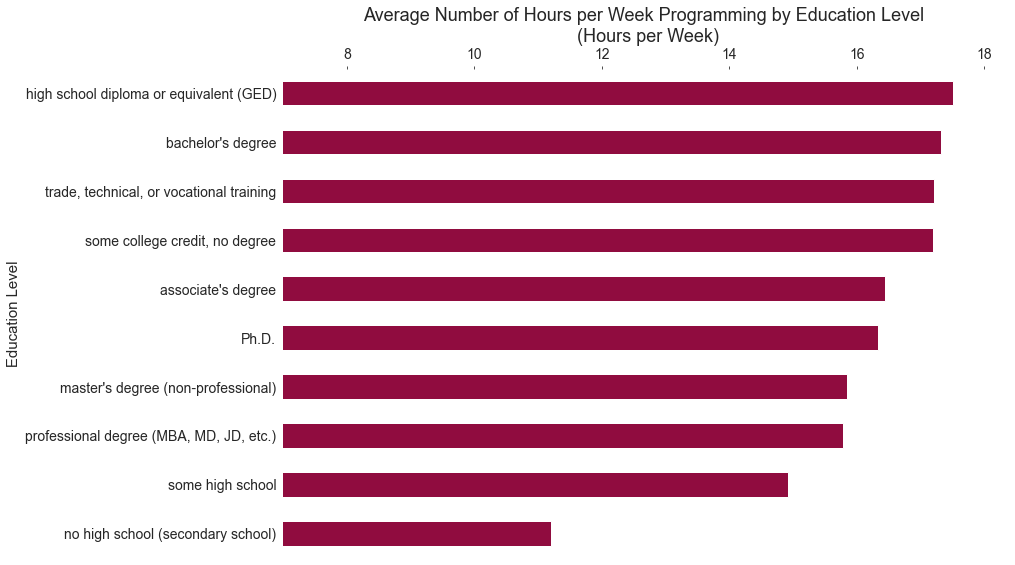

In [86]:
fig, ax = plt.subplots(figsize = (13,9))
ax = df.groupby("SchoolDegree")["HoursLearning"].mean().sort_values(ascending=False).plot(kind = "barh", xlim=(7), color = "#900C3F")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.title("Average Number of Hours per Week Programming by Education Level \n (Hours per Week)", size = 18)
plt.xticks(size = 14)
plt.ylabel("Education Level", size = 15)
plt.yticks(size = 14)
plt.show()

* The average number of months spent programming is about 13 to 14 months, but the data is skewed to the right
with extreme outliers like 744 months (62 years)
* When we find the average for people who have spent equal to or less than 20 months programming we find the average
is closer to 6, which is probably a more realistic number for new programmers
* Based on the question about current employment, people who stated they are unable to work, a stay at home parent,
in the military, and employed for wages have the least amount of time to each week to learn programming